# Assignment 1

During this first assignment you will create your own dataset, implement and perform linear regression and investigate its results with different datasets.

1. Create datasets, set noise, add outliers, create large/small set
2. Perform Least squares with SK learn
3. Implement least squares manually
4. Bonus

Publish your notebook to Machine Learning repository on Github.

### Deadline 28 September 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# Creating the dataset

In order to create the dataset we will use the [scikit-learn](http://scikit-learn.org/) toolkit (install first!). Specifically the [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function, which generates a dataset that is a good target for regression.

## Problem 1
Create several different datasets. Vary their sizes, levels of noise and add some outliers.

It is only necessary to create them (you can visualize them for yourself, but you don't need to hand this in). You are going to use them in the next problem.

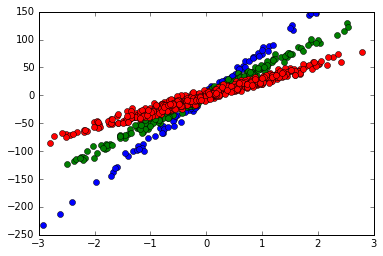

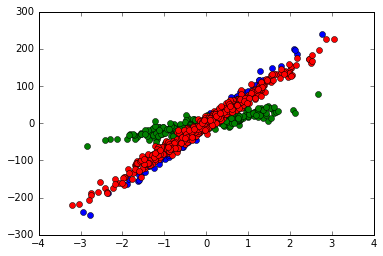

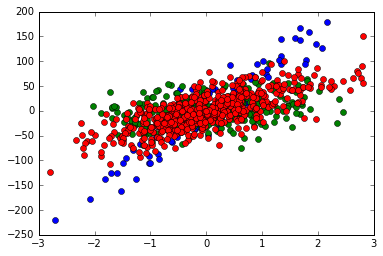

In [2]:
from sklearn.datasets import make_regression

n_dimensions = 1 #We are doing univariate regression, so leave this at 1

## Dataset 1 (test) - Low number of samples, low noise
noise = 5 #Standard deviation of added Gaussian noise
n_samples = 100 #Size of the dataset
(x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
(x1_test,y1_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=noise)
plt.plot(x1,y1,'o')

## Dataset 2 (test/training) - Average number of sample, low noise.
n_samples = 250
(x2,y2) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
plt.plot(x2,y2,'o')

## Dataset 3 (training) - High number of samples, low noise.
n_samples = 500
(x3, y3) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
plt.plot(x3,y3,'o')
plt.show()

## Dataset 4 (test) - Low number of samples, average noise.
n_samples = 100
noise = 10
(x4,y4) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
plt.plot(x4, y4,'o')

## Dataset 5 (test/training) - Average number of samples, average noise.
n_samples = 250
(x5, y5) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
plt.plot(x5, y5,'o')

## Dataset 6 (training) - High number of samples, average noise.
n_samples = 500
(x6, y6) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
plt.plot(x6, y6,'o')
plt.show()

## Dataset 7 (test) - Low number of samples, high noise.
n_samples = 100
noise = 25
(x7, y7) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
plt.plot(x7, y7,'o')

## Dataset 8 (test/training) - Average number of samples, high noise.
n_samples = 250
(x8, y8) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
plt.plot(x8, y8,'o')

## Dataset 9 (training) - High number of samples, high noise.
n_samples = 500
(x9, y9) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
plt.plot(x9, y9,'o')
plt.show()

## In the figures the datasets of size 100 are blue, size 250 green and 500 red.


# Perform Linear Regression

Scikit-learn has an implementation of [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Below you see an example of how to use it.

## Problem 2
Use the scikit-learn method to fit your own datasets. What is the effect on the score of varying the amount of noise?

0.98471395252


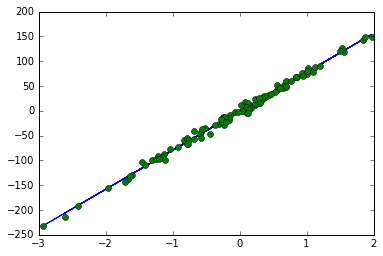

In [3]:
from sklearn.linear_model import LinearRegression

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()

#Fit the regression object on the data
regr.fit(x1,y1)

#Print the score that the fit has
print regr.score(x1_test,y1_test)

#Plot the resulting line
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()

train = 250, test = 100, score =  0.855471900082


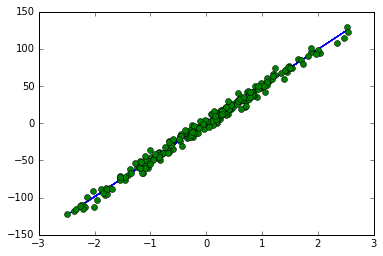

train = 500, test = 100, score =  0.582626942649
train = 500, test = 250, score =  0.809123766164


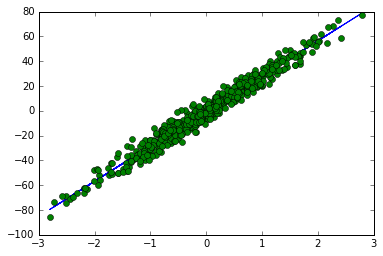

In [4]:
## First case, small noise = 5, training sets size 250 and 500. 
regr = LinearRegression()

#Fit the regression object on the data
regr.fit(x2,y2)

#Print the score that the fit has
print "train = 250, test = 100, score = ", regr.score(x1, y1)

#Plot the resulting line
plt.plot(x2,regr.predict(x2))
plt.plot(x2,y2,'o')
plt.show()

regr.fit(x3, y3)
print "train = 500, test = 100, score = ", regr.score(x1,y1)
print "train = 500, test = 250, score = ", regr.score(x2,y2)

plt.plot(x3, regr.predict(x3))
plt.plot(x3, y3, 'o')
plt.show()


train = 250, test = 100, score =  0.401110315558


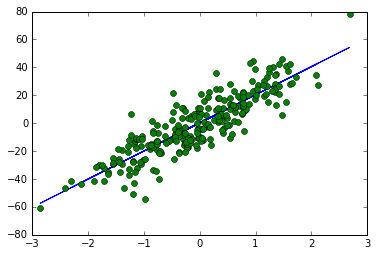

train = 500, test = 100, score =  0.957925539987
train = 500, test = 250, score =  -4.37076533081


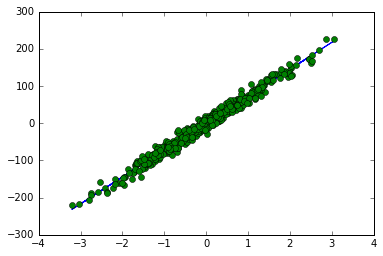

In [5]:
## Second case, average noise = 10, training sets size 250 and 500, test with 100 and 250. 
regr = LinearRegression()

#First training, dataset of size 250.Test with set of size 100
regr.fit(x5,y5)
print "train = 250, test = 100, score = ", regr.score(x4, y4)

#Plot the resulting line
plt.plot(x5,regr.predict(x5))
plt.plot(x5,y5,'o')
plt.show()

# Second trainingset, size 500. Test with sizes 100 and 250
regr.fit(x6, y6)
print "train = 500, test = 100, score = ", regr.score(x4,y4)
print "train = 500, test = 250, score = ", regr.score(x5,y5)

plt.plot(x6, regr.predict(x6))
plt.plot(x6, y6, 'o')
plt.show()

train = 250, test = 100, score =  0.168210937714
train = 250, test = 500, score =  0.260553037498


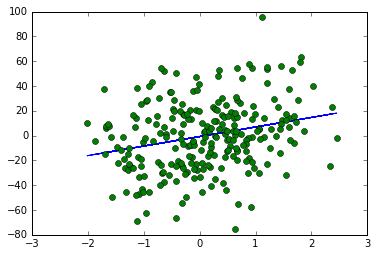

train = 500, test = 100, score =  0.541156116404
train = 500, test = 250, score =  -0.4327128545


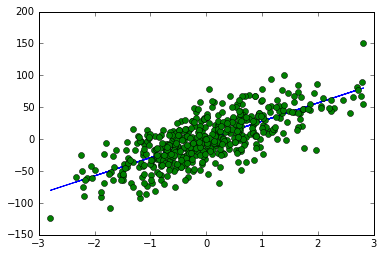

In [6]:
## Third case, average noise = 25, training sets size 250 and 500, test with 100 and 250. 
regr = LinearRegression()

#First training, dataset of size 250.Test with set of size 100
regr.fit(x8,y8)
print "train = 250, test = 100, score = ", regr.score(x7, y7)
print "train = 250, test = 500, score = ", regr.score(x9,y9)

#Plot the resulting line
plt.plot(x8,regr.predict(x8))
plt.plot(x8,y8,'o')
plt.show()

# Second trainingset, size 500. Test with sizes 100 and 250
regr.fit(x9, y9)
print "train = 500, test = 100, score = ", regr.score(x7,y7)
print "train = 500, test = 250, score = ", regr.score(x8,y8)

plt.plot(x9, regr.predict(x9))
plt.plot(x9, y9, 'o')
plt.show()

# Your analysis


I decided to make three groups of three datasets. Every dataset in a group has the same noise score, but the size differs. 

Firstly, I looked at the plots in which the three datasets are represented as dots. The first thing I noticed that if I were to draw a line through the datasets by hand, in certain cases the lines would not match at all. This is especially visible in the sets with less noise, the data is spread in an almost linear way; the sets with a higher noise are more spread out, so the change that the hypothesis fits a dataset is higher. The reason for this can be found in the fact that the data sets are randomly generated. As we expect that the datasets are more similar in realistic applications the following tests are not representative for the actual accuracy of the hypotheses and predictions.

Secondly, I ran the linear regression from the scikit-learn toolkit. As expected the regression score of the predictions was lower when the datasets differed more visibly. But in the case that the datasets were actually similar the predictions reached scores around 0.9, which is very good.  These scores were mostly reached on the datasets with more noise. The influence of the amount of training examples is not directly clear from this experiment. 

In short, this experiment has big limitations as the datasets we compare are randomly generated and thus not comparable. This could be solved by generating one very large dataset and taking several subsets from it to train and test. One conclusion we can draw is that if we use data sets with a high noise it is more likely that the hypothesis will fit other datasets with a lot of noise. 

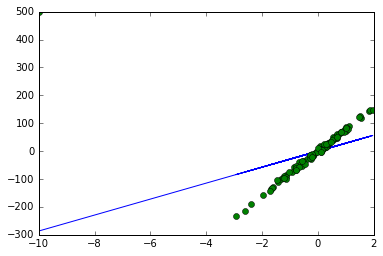

In [7]:
# Add a serious outlier and see what happens
# Use new variables to prevent influenced results later in the notebook.
x_outlier = x1
y_outlier = y1

x_outlier[-1] = -10 
y_outlier[-1] = 500


#Create a plot that shows how the prediction can be very wrong in the presence of a serious outlier.
plt.plot(x_outlier,regr.predict(x_outlier))
plt.plot(x_outlier,y_outlier,'o')
plt.show()

# Result depends on the original dataset, for some reason there those were the outlier doesn't have a big effect.

## Problem 3: Implement Linear regression

In class you looked at performing regression using gradient descent. Now you are going to implement it.

Make sure to comment your code!

#### The data structures we are using are:
x: an array of shape [n_samples, n_features]; As we only use one feature, the shape is [n_samples] 

y: an array of shape [n_samples] 

x_predict: an array of shape [n_samples], where every value is the outcome of the hypothesis with the given theta's and the corresponding x-value from x.


In [8]:
#Make a prediction function h, which returns x_predict, which is a matrix. 
def prediction_function(x,theta0,theta1):
    """Calculates the hypothesis with the given x.
    
    x              : array
    theta0, theta1 : number
    output         : array
    """ 
    return  np.add(np.multiply(np.copy(x), theta1), theta0)    


In [9]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
    """Computes the cost function.
    x_predict, y : array
    output       : number
    """
    x_pred = np.copy(x_predict)
    y1 = np.copy(y)
    return np.sum(np.square(np.add(x_pred, np.multiply(y1, -1)))) / (2 * x_predict.size)

In [17]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    """For every x and y combination it computes the derivative relative to both theta0 and theta1.
    x_predict, x, y : array
    output          : tuple
    """
    x_pred = np.copy(x_predict)
    common_part = np.square(np.add(x_pred, np.multiply(np.copy(y), -1)))
    rel_theta_0 = np.sum(common_part) / x_predict.size
    rel_theta_1 = np.sum(np.multiply(common_part, np.copy(x))) / x_predict.size
    return (rel_theta_0, rel_theta_1)

I chose to make gradient_descent a new function to make sure there are no global variables 
lying around that could affect the other cells. I also chose to make the theta0,
theta1, iterations and stopcondition optional arguments in order to be able to vary
them easily.

In [18]:
def gradient_descent(x, y, alpha=0.1, theta0=0, theta1=1, iterations=10, stopcondition=0.1):
    """Apllies gradient descent for vectors x and y. When finished, plots the values 
    of the cost function for every iteration and the dataset with the final hypothesis.
    x, y    : array
    output  : tuple (theta0, theta1)
    """
    theta_0 = theta0
    theta_1 = theta1
    i = 0
    
    # Store the x_predict and cost outside the loop to prevent unnecessary recalculation.
    # Calculate on initialization to facilitate first loop.
    x_predict = prediction_function(x, theta0, theta1)
    cost = cost_function(x_predict, y)
    cost_values = []
    
    
    while (i < iterations) and (cost > stopcondition):
        i += 1
        gradients = compute_gradient(x_predict, y, x)
        theta_0 = theta_0 - alpha * gradients[0]    # Immediate updating is possible as we already used 
        theta_1 = theta_1 - alpha * gradients[1]    # the original values to calculate the hypothesis.
        x_predict = prediction_function(x, theta_0, theta_1)
        cost = cost_function(x_predict, y)
        cost_values.append(cost)
       
    # Plot the values of the cost function.
    print gradients
    plt.plot(cost_values)
    plt.ylabel('Error')
    plt.xlabel('Iterations')
    plt.show()
    
    # Plot the dataset with the found hypothesis.
    plt.plot(x,x_predict)
    plt.plot(x,y,'o')
    plt.show()


dataset 2
(inf, nan)


D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: overflow encountered in square
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: overflow encountered in square


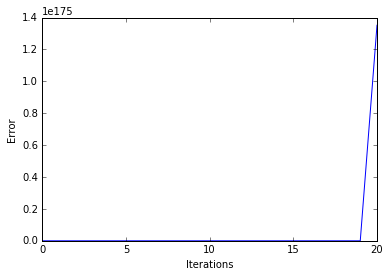

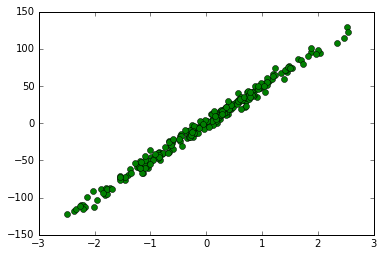

(1387294.4449139046, -257562.02503858047)


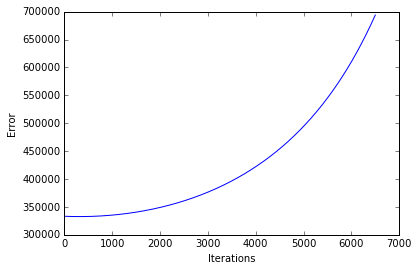

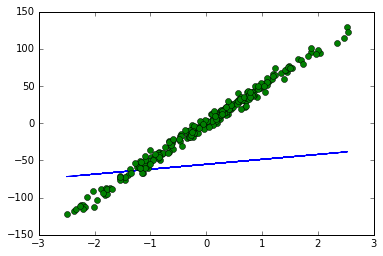

(665826.35663445957, -31027.236985556276)


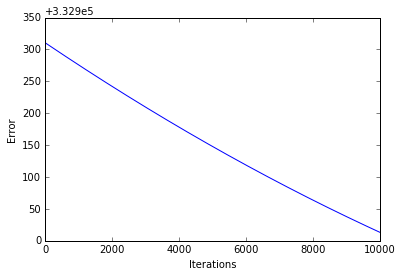

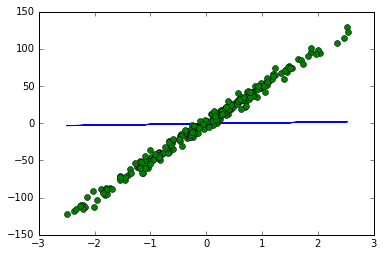

(666420.79207404947, -30719.402741346807)


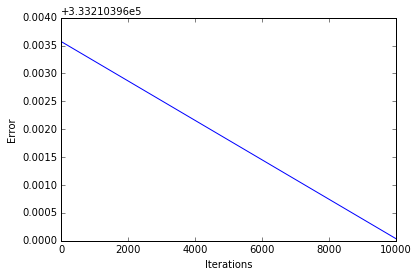

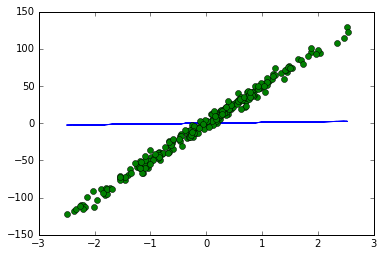

In [19]:
print "dataset 2"
gradient_descent(x2, y2, alpha=1e-5, iterations=25)
gradient_descent(x2, y2, alpha=1e-8, iterations=6500)
gradient_descent(x2, y2, alpha=1e-10, iterations=10000) # best one for this dataset
gradient_descent(x2, y2, alpha=1e-15, iterations=10000)

dataset 3
(inf, nan)


D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: overflow encountered in square
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: overflow encountered in square


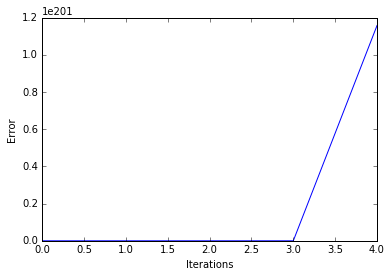

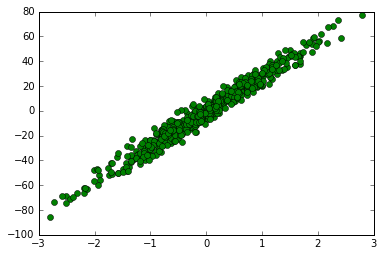

(inf, nan)


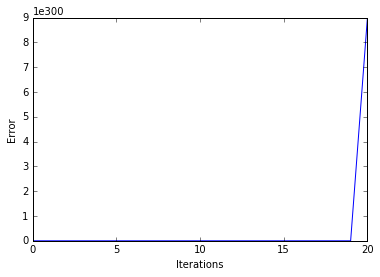

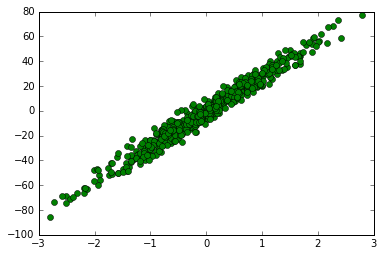

(401693.88831773569, -9836.5862833397623)


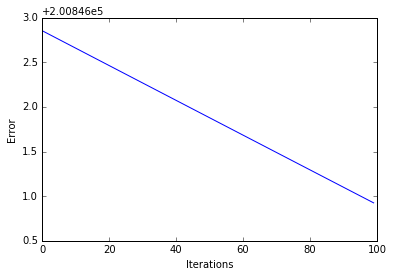

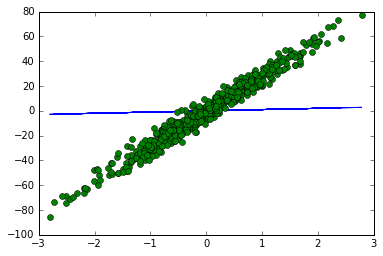

(401659.55690597626, -9869.9611626886126)


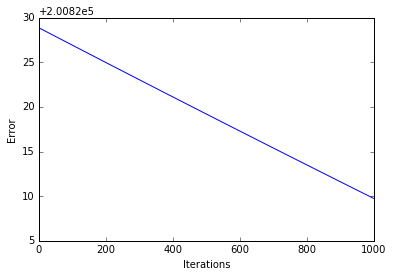

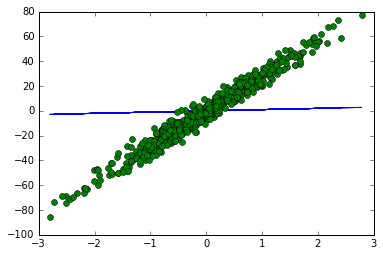

(401522.87720876886, -10019.414016130335)


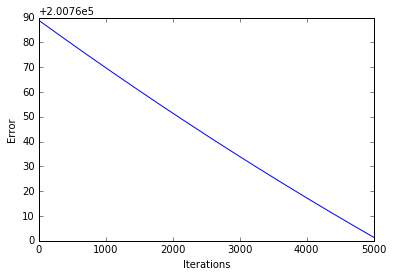

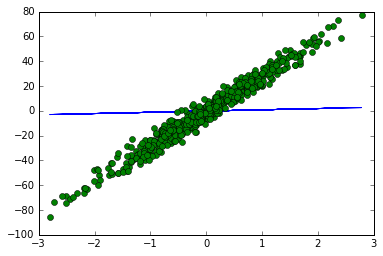

In [13]:
print "dataset 3"
gradient_descent(x3, y3, iterations=100)
gradient_descent(x3, y3, alpha=1e-5, iterations=100)
gradient_descent(x3, y3, alpha=1e-10, iterations=100)
gradient_descent(x3, y3, alpha=1e-10, iterations=1000)
gradient_descent(x3, y3, alpha=1e-10, iterations=5000)

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: overflow encountered in square
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: overflow encountered in square


(inf, nan)


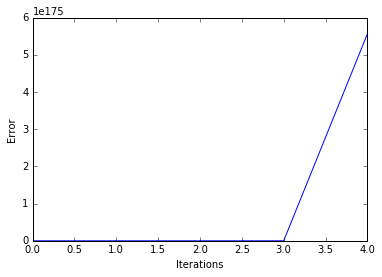

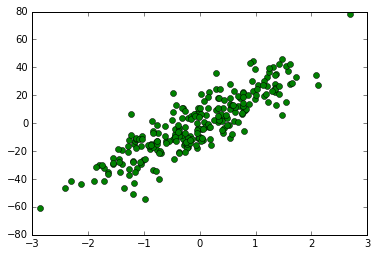

(2395185.8349580723, -455201.36960539338)


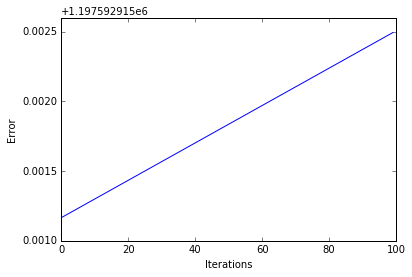

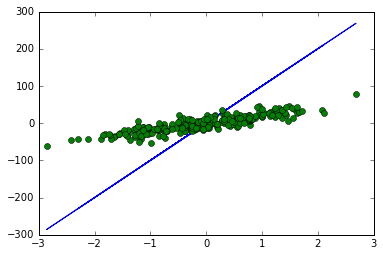

alpha 1e-10, without and with theta1=20
(121150.20501781112, -6942.6090615853891)


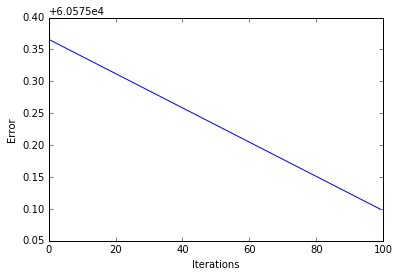

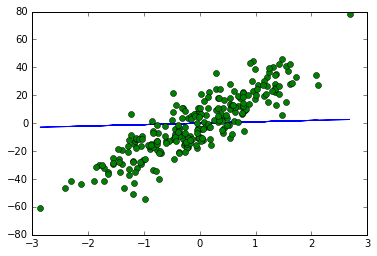

(211439.5065247828, -18008.483392429014)


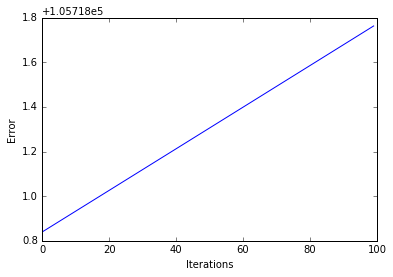

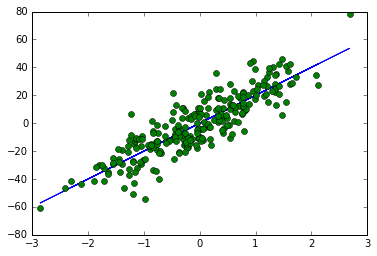

alpha 1e-20, without and with theta1=20
(121150.73746837958, -6942.1235479876168)


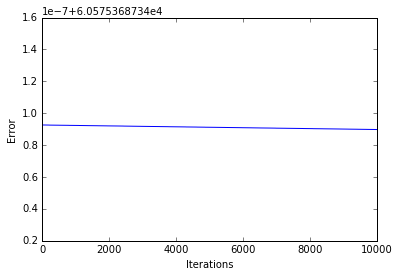

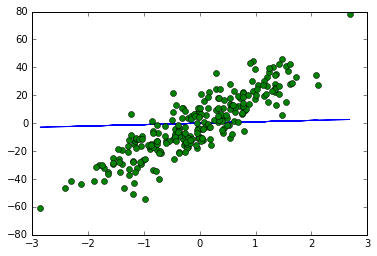

(211437.66062074076, -17989.20853279133)


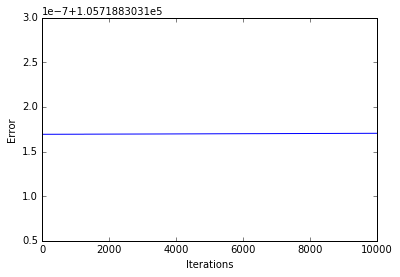

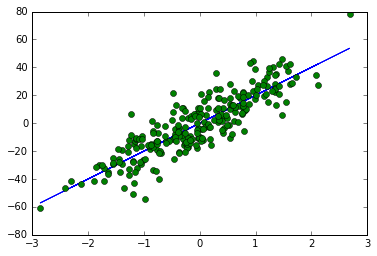

In [20]:
# Dataset 5 - Average noise
gradient_descent(x5, y5, iterations=100)
gradient_descent(x5, y5, alpha=1e-15, theta1=100, iterations=100)

# Difference between given theta1 that approaches the desired value and without. 
print "alpha 1e-10, without and with theta1=20"
gradient_descent(x5, y5, alpha=1e-10, iterations=100)
gradient_descent(x5, y5, alpha=1e-10, theta1=20, iterations=100)
print "alpha 1e-20, without and with theta1=20"
gradient_descent(x5, y5, alpha=1e-20, iterations=10000)
gradient_descent(x5, y5, alpha=1e-20, theta1=20, iterations=10000)



dataset 7
(inf, nan)


D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: overflow encountered in square
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: overflow encountered in square


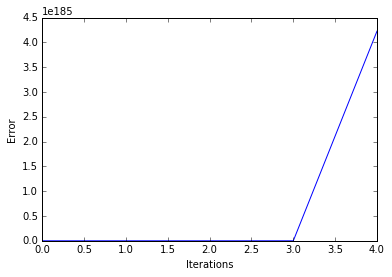

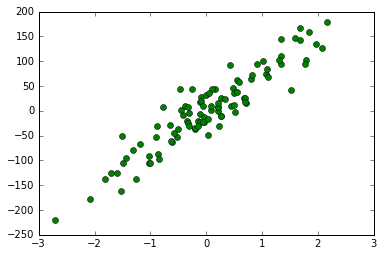

(8.0296148335506917e+273, -7.6697474401342841e+273)


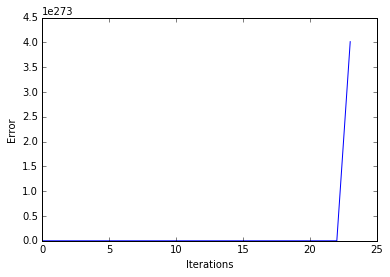

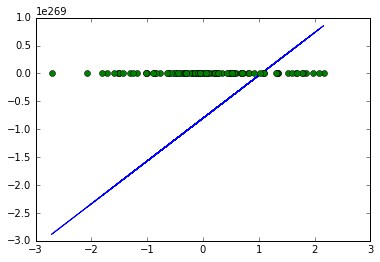

(841753.45299084578, 14506.503775824001)


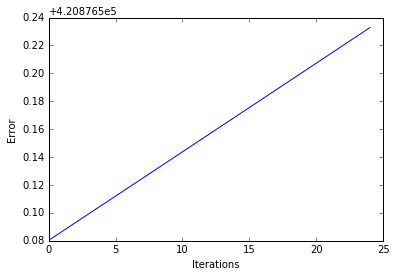

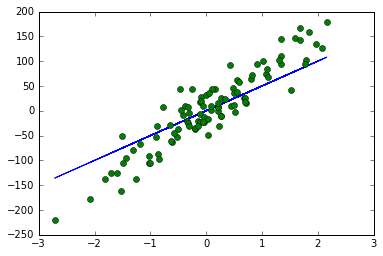

(662506.36168883368, 16728.110661096889)


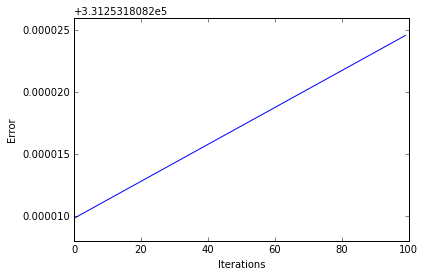

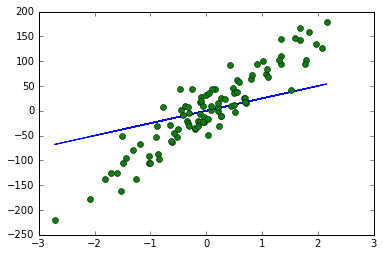

(841753.1479065062, 14525.849901633374)


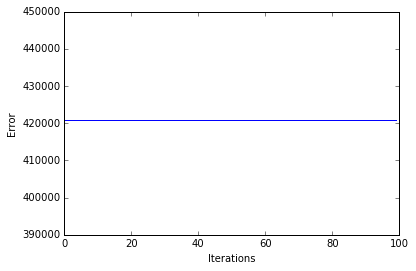

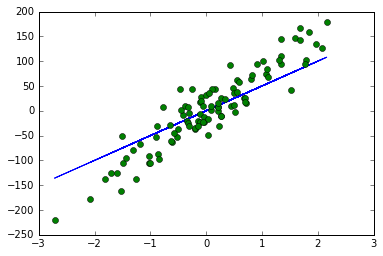

In [15]:
print "dataset 7"
gradient_descent(x7, y7)
gradient_descent(x7, y7, alpha=1e-5, theta1=50, iterations=25)
gradient_descent(x7, y7, alpha=1e-10, theta1=50, iterations=25)
gradient_descent(x7, y7, alpha=1e-15, theta1=25, iterations=100)
gradient_descent(x7, y7, alpha=5e-22, theta1=50, iterations=100)




## Problem 4

Write a short analysis about the amount of iterations necessary to obtain a good result, the influence of the learning rate and the trend of the cost function. 

First of all I should mention that there is probably an error in my code with respect to the cost function and gradient results. 
I ran a series of experiments in order to understand what happened thoroughly. I have a couple of observations.

Firstly, the amount of iterations is significant. For some combinations of datasets and alphas the error might decrease over the first 1000 iterations, but actually start increasing again after 2000 or even 10 000 iterations. 

Secondly, The results can differ greatly depending on the starting values of theta0 and theta1. In one of the experiments I varied theta1 while keeping all other values constant. Still the plots of the cost_function results flipped. This cuold be due to the fact that the alpha is still too big and we passed a certain treshold which caused divergence.

Thirdly, for these datasets the alpha has to be chosen (very) small. If the alpha was too big this resulted in values like inf and NaN. Thus, it started to diverge very fast. 




# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.